In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [164]:
#Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [165]:
#Checking the look and feel of dataset
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
66,7.5,0.520,0.11,1.5,0.079,11.0,39.0,0.99680,3.42,0.58,9.6,5
1094,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8,6
415,8.6,0.725,0.24,6.6,0.117,31.0,134.0,1.00140,3.32,1.07,9.3,5
258,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5
1191,6.5,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8,5


In [166]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [167]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


quality has various unique values

In [168]:
#checking the unique label values
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

As we can see, the quality ranges from 03 to 08 with 03 being the lowest and 08 being the highest

As suggested in the problem discription, converting the labels into only two variables.
Reference text (What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.)

In [169]:
df.loc[df.quality >= 7, 'quality'] = 1

In [170]:
#checking the unique label values
df.quality.unique()

array([5, 6, 1, 4, 3], dtype=int64)

In [171]:
df.loc[df.quality > 1, 'quality'] = 0

In [172]:
#checking the unique label values
df.quality.unique()

array([0, 1], dtype=int64)

In [173]:
df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

There is an imbalance in the data w.r.t label

In [174]:
#checking the data shape
df.shape

(1599, 12)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All features are not float64 datatype

In [176]:
#checking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values in dataset

In [177]:
df.describe().T #since no.of columns are more, therefore using the 'transpose' method

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


1. no null values confimed
2. skewness observed  in total sulfur dioxide, free sulfur dioxide
3. possibility of skewness

In [178]:
#describing the data visually
plt.figure (figsize = (10,6))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot = True, fmt = 'f',cmap='Blue')
plt.xticks(fontsize = 14)
plt.yticks (fontsize = 12)
plt.title ("Varriable Summary")
plt.show()

ValueError: 'Blue' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

<Figure size 720x432 with 0 Axes>

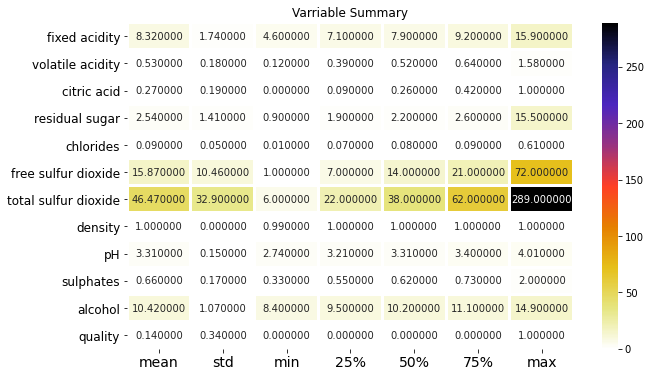

In [179]:
#describing the data visually
plt.figure (figsize = (10,6))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot = True, fmt = 'f',cmap='CMRmap_r')
plt.xticks(fontsize = 14)
plt.yticks (fontsize = 12)
plt.title ("Varriable Summary")
plt.show()

The data is not scaled, scaling will be required

In [180]:
#checking the corelation between the data

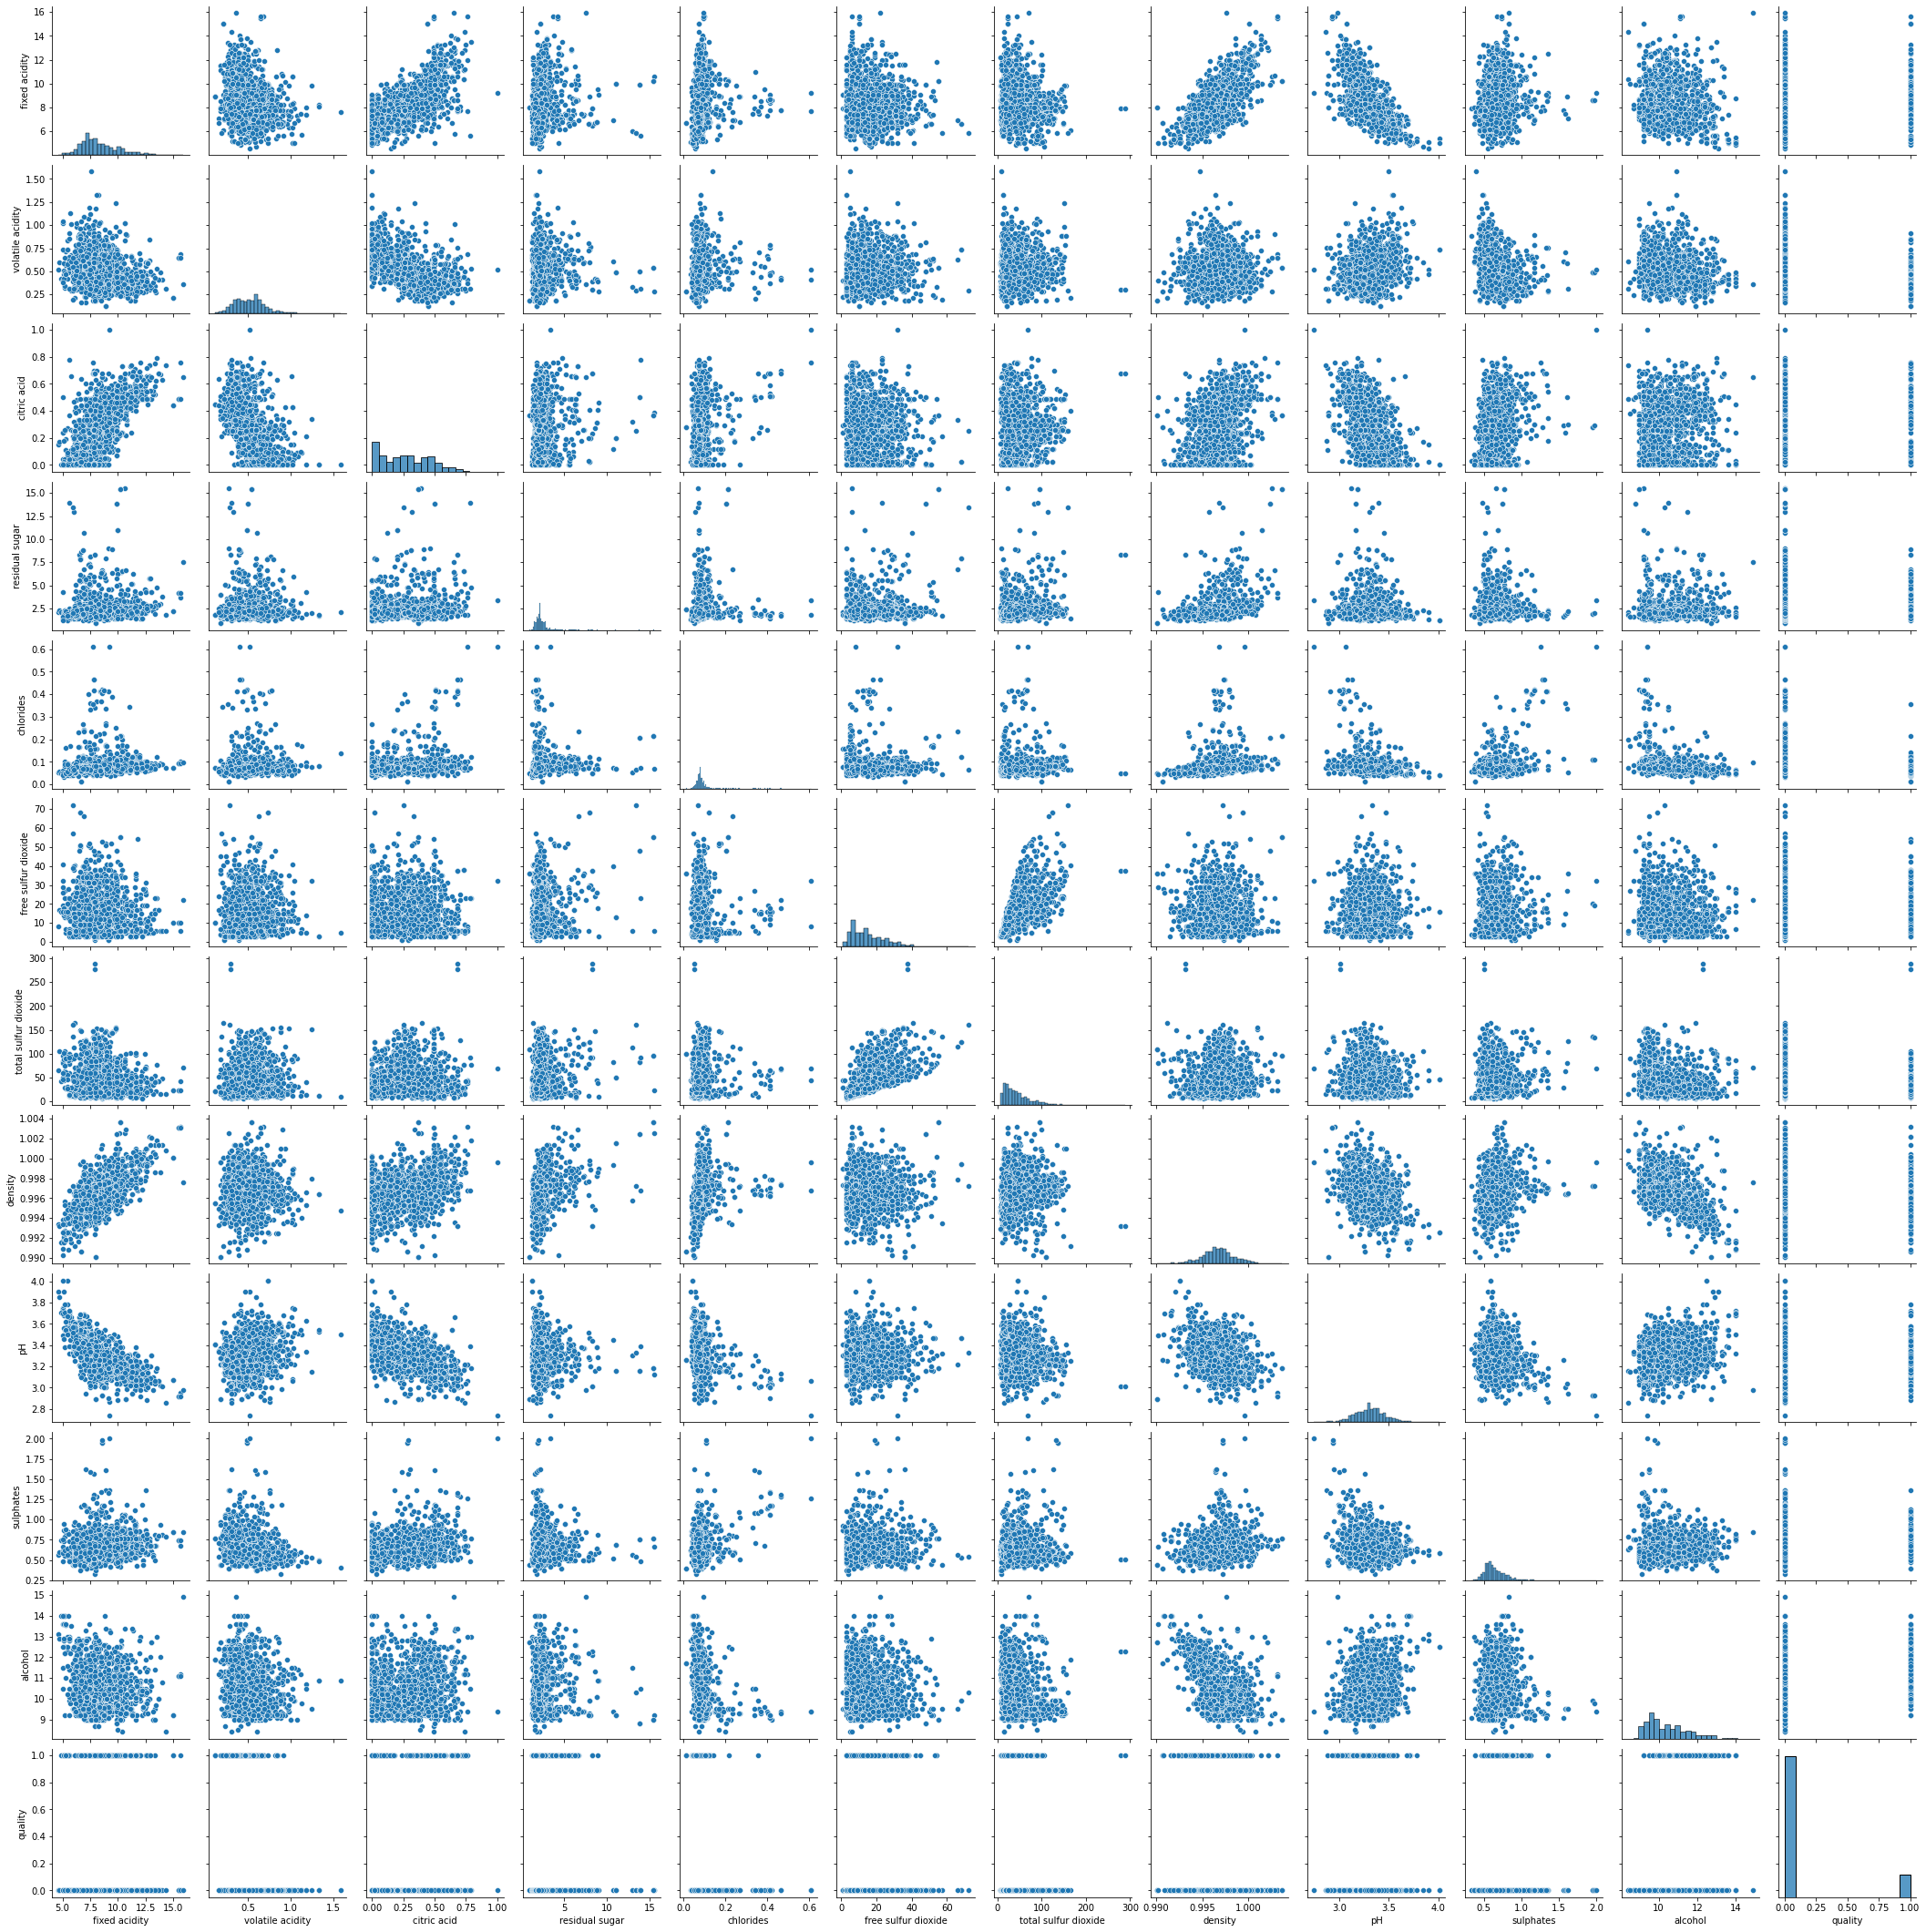

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot (df)
plt.savefig('pairplot.png')
plt.show()

1. Imbalance is observed in many features
2. data is not normally distributed (to be confirmed further with more EDA teachniques)
3. not all the features have equal co-relation with label

<AxesSubplot:xlabel='quality', ylabel='count'>

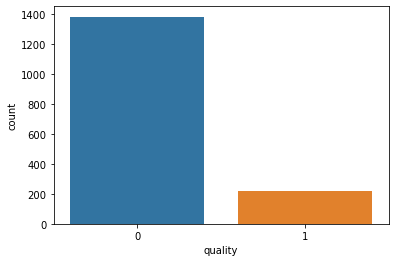

In [182]:
sns.countplot(x='quality', data = df)

imbalance is confirmed in the label

In [183]:
#checking the corelation using heatmaps (only absolute values)

<AxesSubplot:>

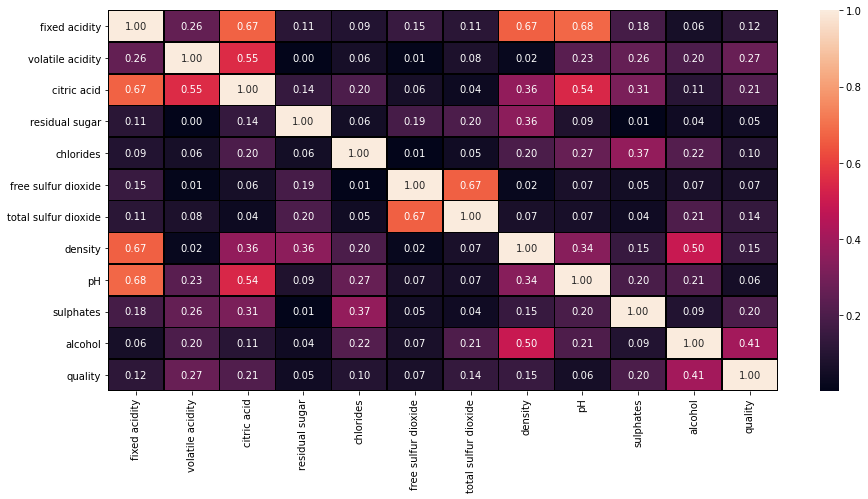

In [184]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr().abs(), annot = True, linewidths=0.5, linecolor  = "black", fmt='.2f')

1. residual sugar, free sufur dioxide and ph have very low corelation with the label
2. alcohol, volatile acidity and citric acidicty have high corelation with label

In [185]:
df_corr = df.corr().abs()['quality'].sort_values() #checking the correlations with label in ascending order
df_corr

residual sugar          0.047779
pH                      0.057283
free sulfur dioxide     0.071747
chlorides               0.097308
fixed acidity           0.120061
total sulfur dioxide    0.139517
density                 0.150460
sulphates               0.199485
citric acid             0.214716
volatile acidity        0.270712
alcohol                 0.407315
quality                 1.000000
Name: quality, dtype: float64

alcohol, volatile acidity, citric acid have great correlations with label

<bound method Axes.bar of <AxesSubplot:>>

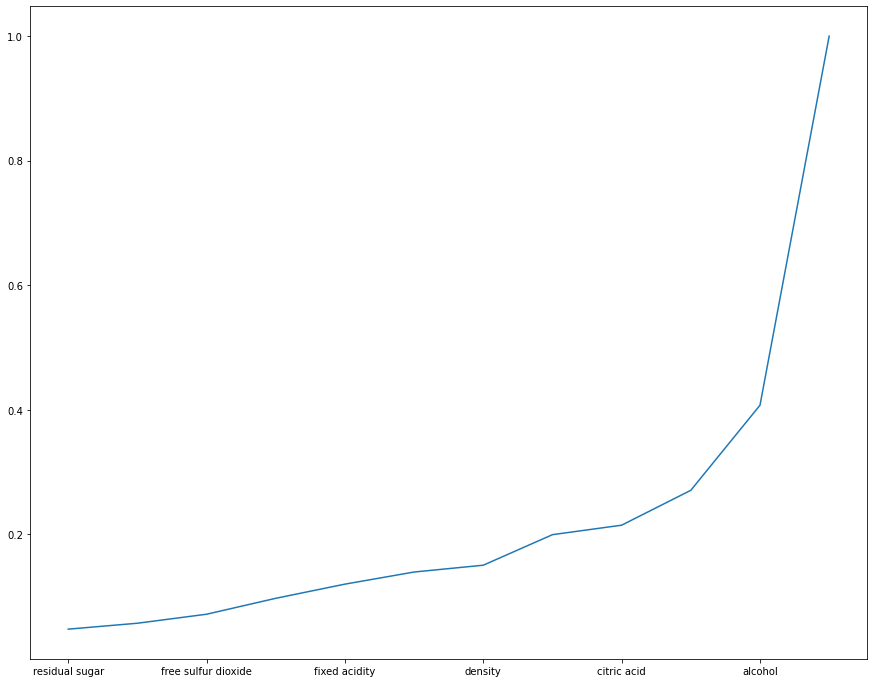

In [186]:
plt.figure (figsize = (15,12))
df_corr.plot().bar #graphichal representation of correlation with label

In [187]:
#Checking for data distribution

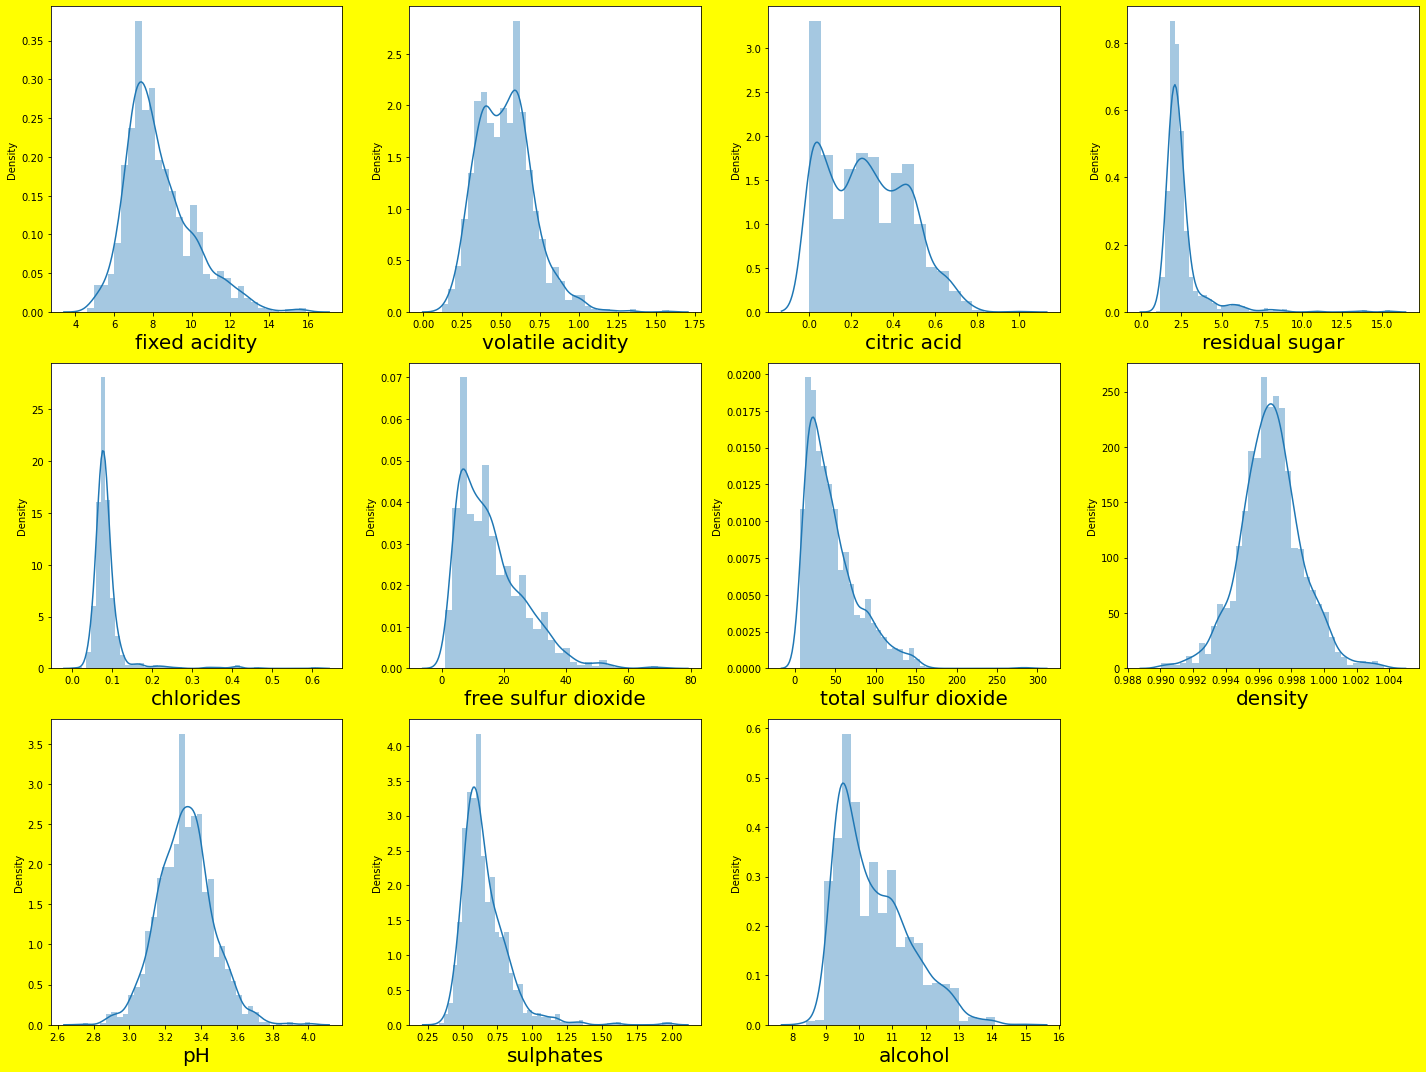

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <12: #here 8 is the number of features
        ax = plt.subplot (3,4, plotnumber)
        sns.distplot (df [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

1. Most of the features have positive skewness
2. Some features are multimodal

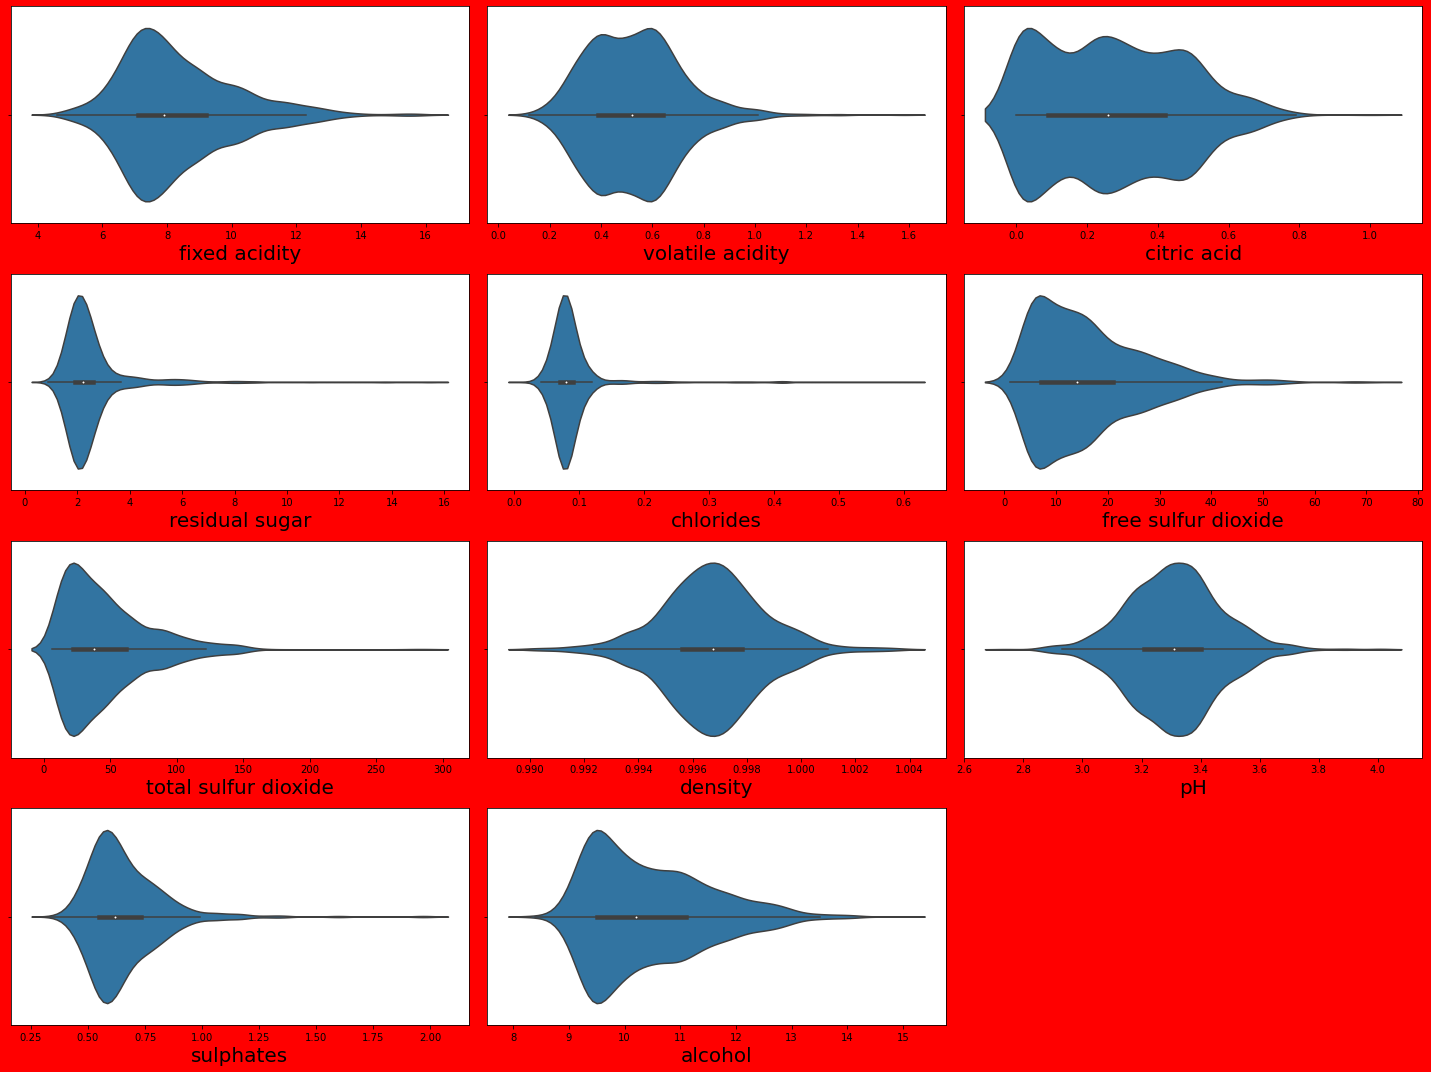

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15), facecolor = 'red')
plotnumber = 1 #this is an initiator

for column in df:
	if plotnumber <12: #here 12 is the number of features
		ax = plt.subplot (4,3, plotnumber)
		sns.violinplot (df[column], hue_order = "yellow")
		plt.xlabel (column, fontsize =20)
	plotnumber +=1
plt.tight_layout()

In [190]:
#Checking for outliers

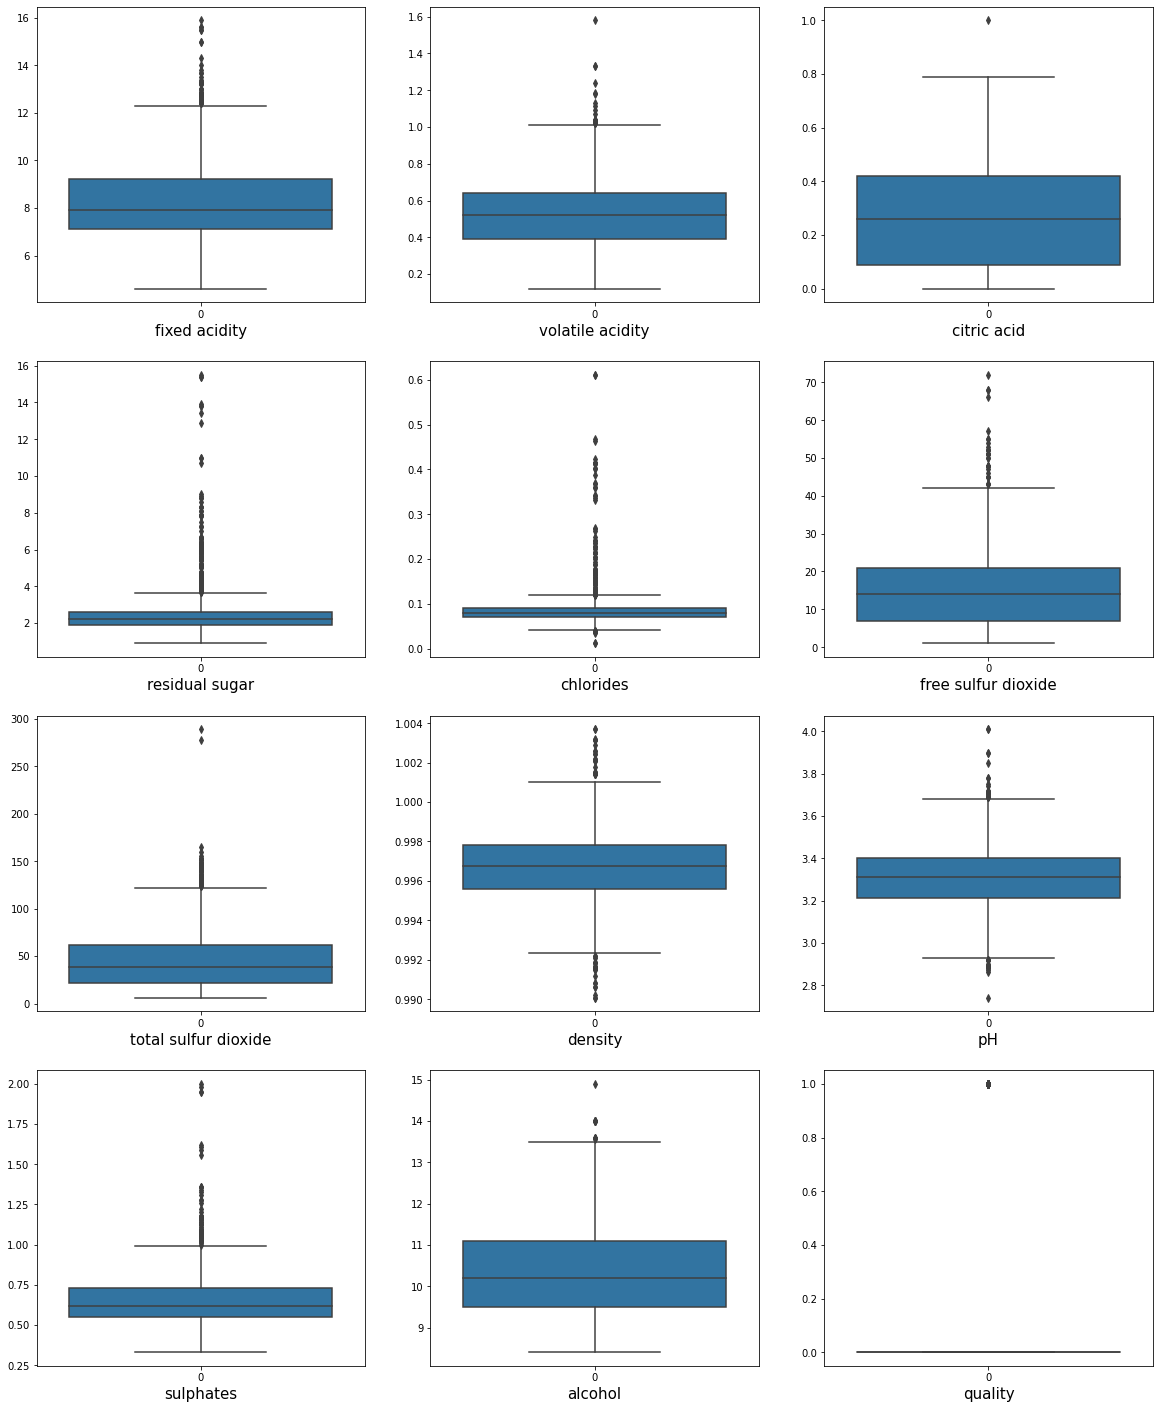

In [191]:
plt.figure (figsize = (20,25))
graph = 1 #Initiator

for column in df:
    if graph <=12: 
        plt.subplot (4,3, graph)
        ax = sns.boxplot (data = df[column],)
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [193]:
from scipy.stats import zscore

z_score = zscore (df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


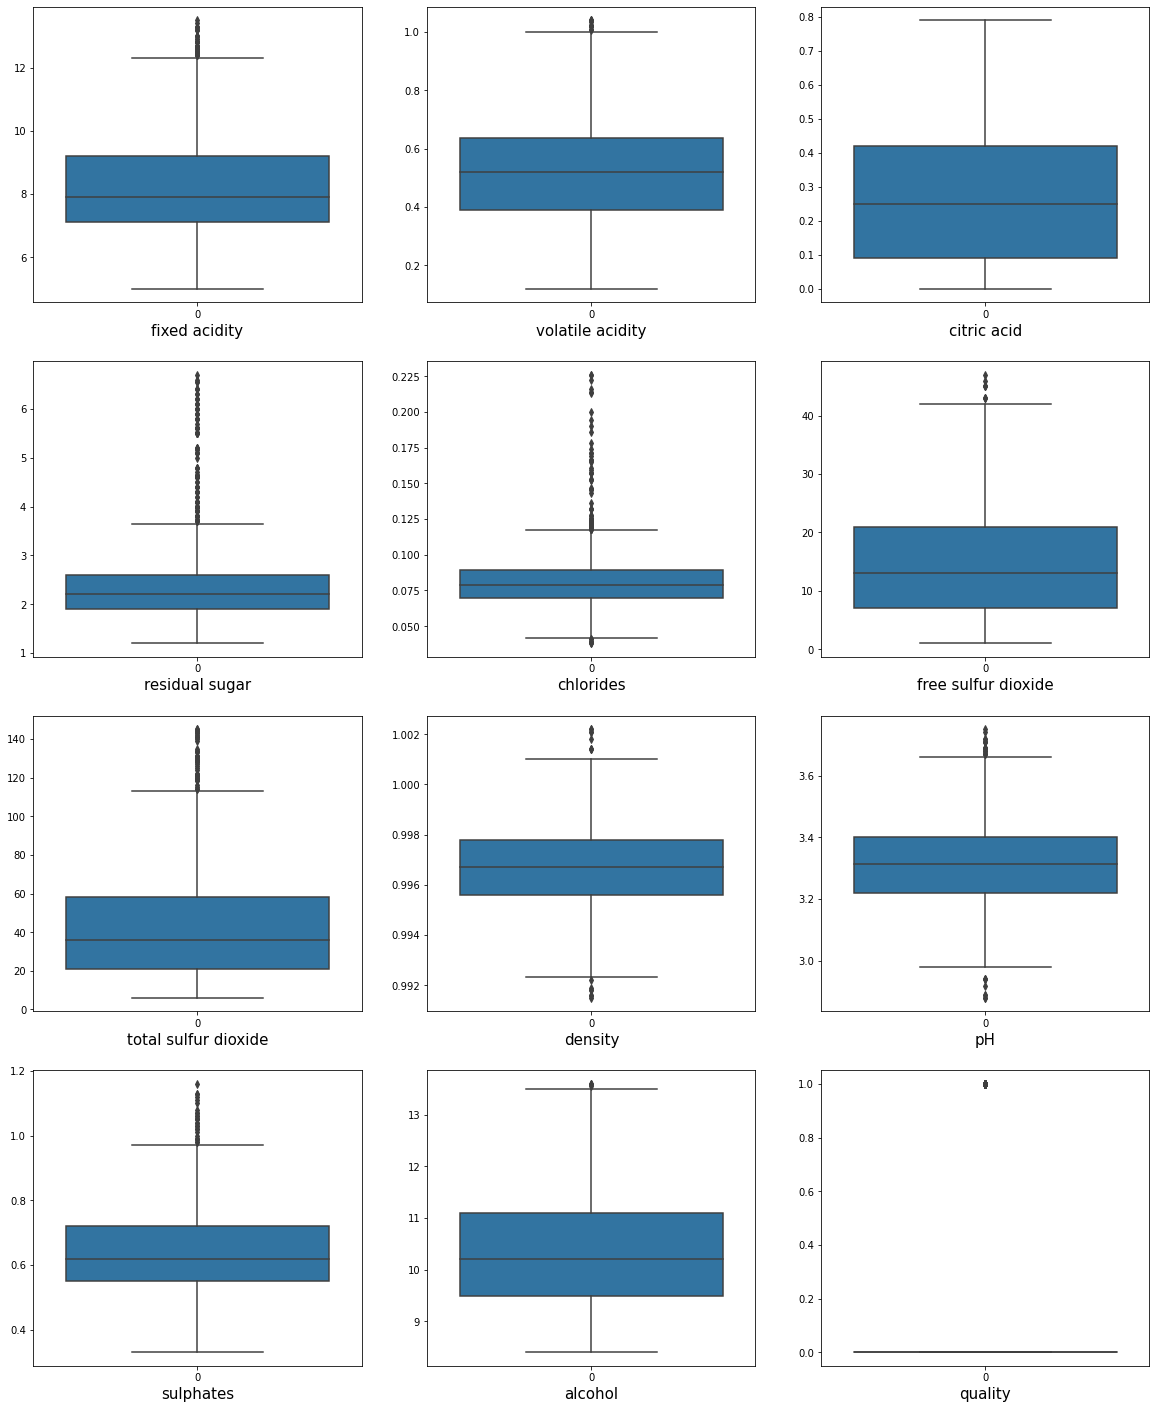

In [194]:
#Checking the boxplot again to check for outliers
plt.figure (figsize = (20,25))
graph = 1 #Initiator

for column in df:
    if graph <=12: 
        plt.subplot (4,3, graph)
        ax = sns.boxplot (data = df[column],)
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()

In [195]:
#Checking for Skewness
df.skew().sort_values()

density                 0.055543
pH                      0.113039
citric acid             0.292600
volatile acidity        0.392097
alcohol                 0.757396
fixed acidity           0.820879
free sulfur dioxide     0.869727
sulphates               0.893297
total sulfur dioxide    1.185230
quality                 2.103030
chlorides               2.307274
residual sugar          2.450707
dtype: float64

In [196]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [197]:
#splitting features & labels

In [198]:
x=df.drop('quality', axis=1)
y= df.quality

In [199]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [200]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [201]:
y.sample(5)

1152    0
791     0
756     0
1335    0
735     0
Name: quality, dtype: int64

In [205]:
#Using Quantile transformer for skewness removal

from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer()
np_array = qt.fit_transform(x) #this will result in numpy array
np_array

array([[0.34334334, 0.86586587, 0.        , ..., 0.9039039 , 0.28578579,
        0.13963964],
       [0.45195195, 0.96996997, 0.        , ..., 0.20920921, 0.67717718,
        0.36186186],
       [0.45195195, 0.91641642, 0.16266266, ..., 0.34234234, 0.60810811,
        0.36186186],
       ...,
       [0.06406406, 0.48298298, 0.31581582, ..., 0.79029029, 0.8048048 ,
        0.72772773],
       [0.02452452, 0.77377377, 0.3013013 , ..., 0.95595596, 0.73923924,
        0.50950951],
       [0.03103103, 0.0955956 , 0.81731732, ..., 0.7012012 , 0.63563564,
        0.72772773]])

In [207]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [210]:
#converting array into dataframe
xt = pd.DataFrame(np_array, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [211]:
xt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.343343,0.865866,0.000000,0.251251,0.400400,0.408408,0.472472,0.752252,0.903904,0.285786,0.139640
1,0.451952,0.969970,0.000000,0.765766,0.869870,0.833834,0.811812,0.517518,0.209209,0.677177,0.361862
2,0.451952,0.916416,0.162663,0.595596,0.798298,0.573073,0.720721,0.568569,0.342342,0.608108,0.361862
3,0.925926,0.058559,0.933934,0.251251,0.374374,0.654154,0.764264,0.788288,0.135135,0.363363,0.361862
4,0.343343,0.865866,0.000000,0.251251,0.400400,0.408408,0.472472,0.752252,0.903904,0.285786,0.139640


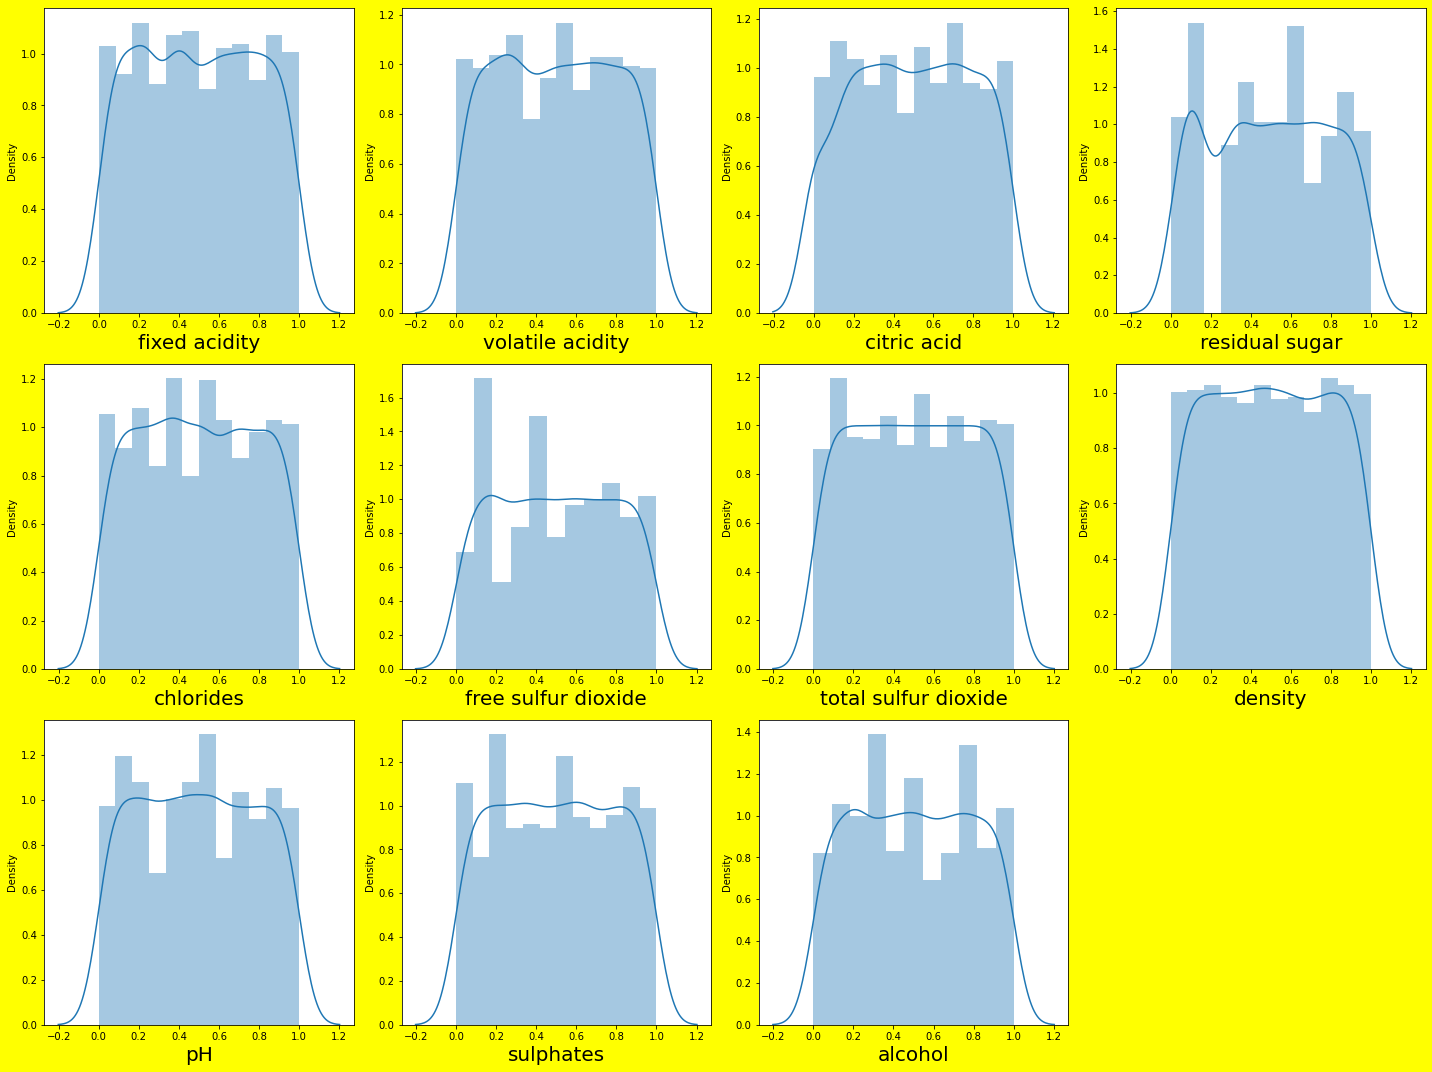

In [217]:
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in xt:
    if plotnumber <12: #here 8 is the number of features
        ax = plt.subplot (3,4, plotnumber)
        sns.distplot (xt [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

<AxesSubplot:xlabel='quality', ylabel='count'>

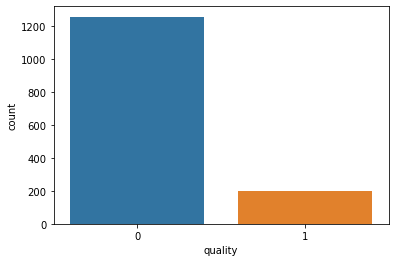

In [213]:
sns.countplot(y)

In [220]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression ()
from sklearn.metrics import r2_score


In [221]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split (xt, y, test_size = 0.2, random_state = i)
    lr.fit (x_train, y_train)
    pred_train = lr.predict (x_train)
    pred_test = lr.predict (x_test)
    print (f"At random state {i}, the training accuracy is: {r2_score (y_train, pred_train)}")
    print (f"At random state {i}, the testing accuracy is: {r2_score (y_test, pred_test)}")
    print ('\n')

At random state 0, the training accuracy is: 0.25541336971919815
At random state 0, the testing accuracy is: 0.24786251291125228


At random state 1, the training accuracy is: 0.2635407183026759
At random state 1, the testing accuracy is: 0.21400386201787913


At random state 2, the training accuracy is: 0.2498647635744885
At random state 2, the testing accuracy is: 0.2620861086296341


At random state 3, the training accuracy is: 0.2614939703573801
At random state 3, the testing accuracy is: 0.2235187812246372


At random state 4, the training accuracy is: 0.25614811795908154
At random state 4, the testing accuracy is: 0.23752320237430535


At random state 5, the training accuracy is: 0.26648144358555126
At random state 5, the testing accuracy is: 0.19357292355733557


At random state 6, the training accuracy is: 0.2608975059268128
At random state 6, the testing accuracy is: 0.21597817284523058


At random state 7, the training accuracy is: 0.25812032348309755
At random state 7, the t

In [222]:
x_train, x_test, y_train, y_test = train_test_split (xt, y, test_size = 0.2, random_state = 11)

In [224]:
import six
import joblib
import sys
sys.modules ['sklearn.externals.six'] = six
sys.modules ['sklearn.externals.joblib'] = joblib

In [225]:
from imblearn.over_sampling import SMOTE

In [234]:
ovr_spl = SMOTE(0.75)
x_train_ns, y_train_ns = ovr_spl.fit_resample (x_train, y_train)


In [235]:
import warnings
warnings.filterwarnings('ignore')

# Using XGBClassifier

In [256]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train_ns, y_train_ns)

[09:31:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [257]:
y_pred = model.predict(x_test)

In [258]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [259]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9006849315068494


# Using KNNClassifier

In [255]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [260]:
knn.fit(x_train_ns, y_train_ns)
y_pred = knn.predict (x_test)

In [261]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [262]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7945205479452054

# Using Decision Tree Classifier

In [264]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_ns, y_train_ns)
y_pred = dtc.predict (x_test)

In [265]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8253424657534246

# Using SVM

In [266]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_ns, y_train_ns)
y_pred = svc.predict (x_test)

In [267]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8493150684931506

# Using Adaboost

In [269]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [270]:
ada.fit(x_train_ns, y_train_ns)
y_pred = ada.predict (x_test)

In [271]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8458904109589042

Here we see that XGBClassifier works the best in this dataset

# AUC RUC Curve

In [278]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

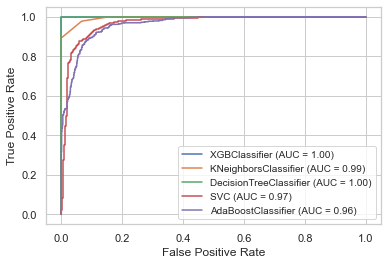

In [280]:
#For Training Data
disp = plot_roc_curve (model, x_train_ns, y_train_ns)
plot_roc_curve (knn, x_train_ns, y_train_ns, ax = disp.ax_)
plot_roc_curve (dtc, x_train_ns, y_train_ns, ax = disp.ax_)
plot_roc_curve (svc, x_train_ns, y_train_ns, ax = disp.ax_)
plot_roc_curve (ada, x_train_ns, y_train_ns, ax = disp.ax_)
plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

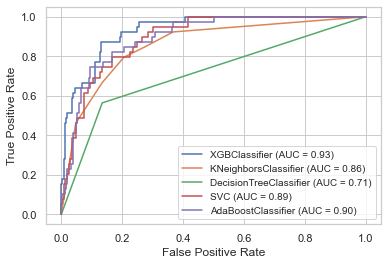

In [281]:
#For Tetsing Data
disp = plot_roc_curve (model, x_test, y_test)
plot_roc_curve (knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve (dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (ada, x_test, y_test, ax = disp.ax_)
plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

Clearly XGB Classifier is the best in this dataset

# Hyper Parameter Tuning

In [282]:
from sklearn.model_selection import GridSearchCV, KFold

In [283]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

In [285]:
gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3))
gs2.fit(x_train_ns, y_train_ns)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

Best score: 0.8815855235650458
Best score: {'base_score': 0.5, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 0.5}


In [295]:
xgb = XGBClassifier(n_estimator = 500, base_score = 0.5,learning_rate = 0.1, reg_aplha = 0, reg_lamdba = 0.5)
xgb.fit(x_train_ns, y_train_ns)
y_pred = xgb.predict (x_test)

[11:40:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator, reg_aplha, reg_lamdba } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [296]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9006849315068494

The Accuracy is Same as before

# Thank You